# Max

## Research question/interests

How are you most likely to reach your intended destination on time using air travel in the US? Taking things into account like departure/arrival location, airline choice, time of year etc. Or more generally, what is the absolute best time, airline, and route if you were trying to have a "perfect" trip. 

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
#import ProjectFunctions1 as p1

In [2]:
airlinedata1=pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
airlinedata2=pd.read_csv('../data/processed/airline_greviance_data_2021.csv')
airlinedata3=pd.read_csv('../data/processed/airline_data_filtered.csv').drop(['Unnamed: 0','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'],axis=1)
# airlinedata1 doesn't include data on baggage etc.
us_map = gpd.read_file('../data/SHP files/States_shapefile.shp')
us_map=us_map.rename(columns={'State_Code':'Statecode'})

In [3]:
df3 = airlinedata3.groupby('Statecode')['weather_delay','arr_delay'].sum().reset_index()
airlinedata1=airlinedata1.drop(['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'],axis=1)
airlinedata1['not_carrier_rltd']=airlinedata1['nas_delay']+airlinedata1['weather_delay']
df = airlinedata1.groupby('carrier_name')['not_carrier_rltd'].sum().reset_index()
airlinedata1['carrier_rltd']=airlinedata1['arr_cancelled']+airlinedata1['arr_diverted']+airlinedata1['arr_delay']+airlinedata1['carrier_delay']+airlinedata1['security_delay']+airlinedata1['late_aircraft_delay']
df1=airlinedata1.groupby('carrier_name')['carrier_rltd'].sum().reset_index()
df2 = airlinedata1.groupby('carrier_name')['arr_flights'].sum().reset_index()

C:\Users\maxti\AppData\Local\Temp\ipykernel_18716\3350257012.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = airlinedata3.groupby('Statecode')['weather_delay','arr_delay'].sum().reset_index()


In [4]:
airlinedata2['cancelled_per_flight'] = airlinedata2.apply(lambda x: x['cancelled_flights'] / x['total_flights'], axis=1)
airlinedata2['mishandeled_per_flight'] = airlinedata2.apply(lambda x: x['bags_mishandled'] / x['total_flights'], axis=1)
airlinedata2['complaints_per_flight']=airlinedata2.apply(lambda x: x['filed_complaints'] / x['total_flights'], axis=1)
df6=airlinedata1.groupby('month')['weather_delay'].sum().reset_index()

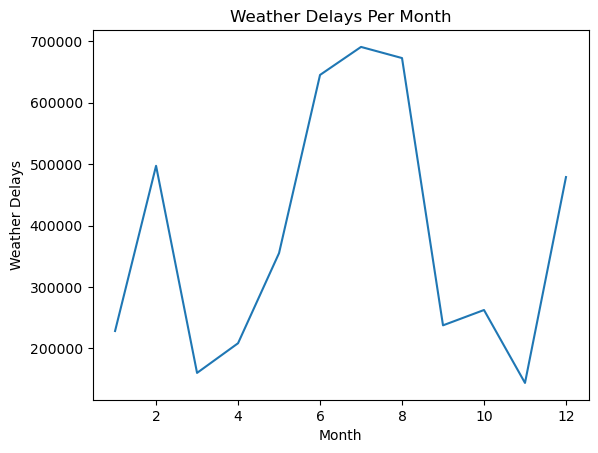

In [13]:
bar=sns.lineplot(data=df6,x='month',y='weather_delay').set(xlabel="Month",ylabel="Weather Delays",title="Weather Delays Per Month")

#### This is interesting because I would assume that most weather delays would happen in the winter months. Although February and December have slight upticks in weather delays the most delays occur in July and August which is very strange given that these are the months when the weather is the best which makes one think that perhaps airlines blame delays on weather when it isn't actually the cause.

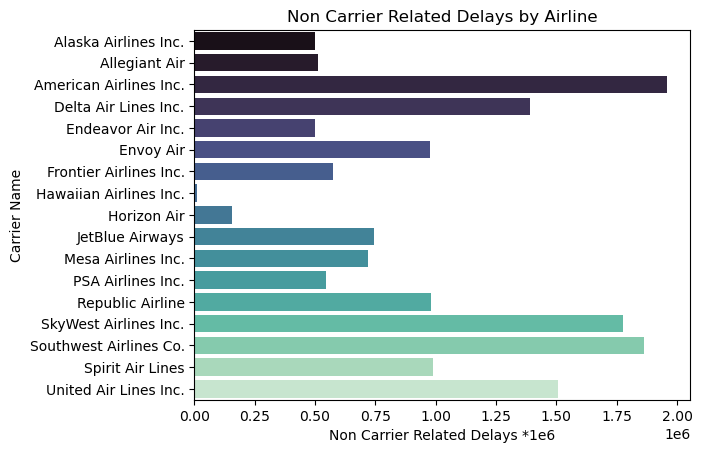

In [6]:
scatter=sns.barplot(data=df,x='not_carrier_rltd',y='carrier_name',palette="mako").set(xlabel="Non Carrier Related Delays *1e6",ylabel="Carrier Name",title="Non Carrier Related Delays by Airline")
#scatter.set_ylabel("Non Carrier Related Delays*1e6")
#scatter.set_xticklabels(labels=['Endeavor','American','Alaska','JetBlue','Delta','Frontier','Allegiant','Hawaiian','Envoy','Spirit','PSA','Skywest','Horizon','United','Southwest','Mesa','Republic'],rotation=60)

#### The most delays not in the control of the carrier comes from Alaska and Southwest airlines. This could be because Alaska especially serves destinations where weather is more extreme then most of the US. And Southwest has a business model that serves smaller,less mainstream destinations and airports which typically have worse technology which could result in more NAS delays when technology fails. Delays not in control of airlines have been defined as weather delays and security delays.

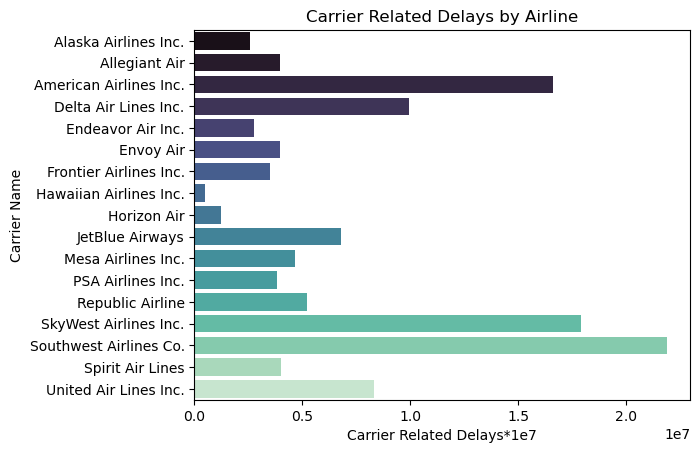

In [11]:
scatter=sns.barplot(data=df1,x='carrier_rltd',y='carrier_name',palette='mako').set(xlabel="Carrier Related Delays*1e7",ylabel="Carrier Name",title="Carrier Related Delays by Airline")
#scatter.set_xticklabels(labels=['Endeavor','American','Alaska','JetBlue','Delta','Frontier','Allegiant','Hawaiian','Envoy','Spirit','PSA','Skywest','Horizon','United','Southwest','Mesa','Republic'],rotation=60)
#scatter.set_ylabel("Carrier Related Delays")

#### The most carrier related delays happen to Southwest and United. This could be biased because of their large fleet sizes but American and Delta both have larger fleets and incure less delays. A surprising stat is the Allegiant, Frontier, and Spirit have relatively low carrier related delays even though they are consistently rated the worst airlines in America. It is not surprising that the regional  carriers like Envoy, Hawaiian and Endeavor don't incure many delays since their fleets are small and the smaller aircraft take less time to turn around on the ground. Carrier related delays are defined as diverted aircraft, cancelled arrival flight, crew scheduling delays, and delayed arrival flight.

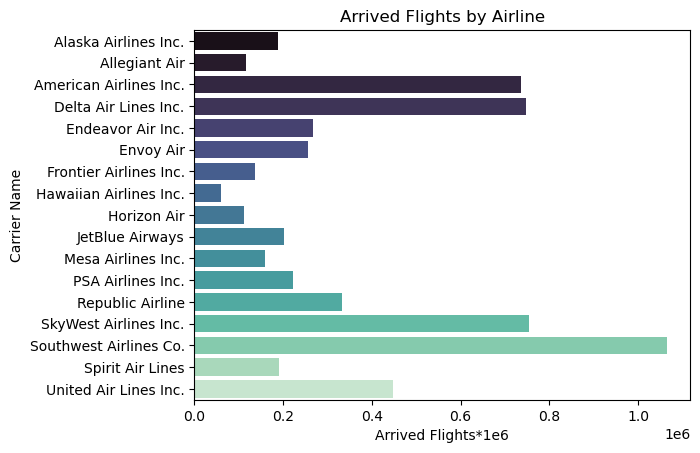

In [13]:
hist=sns.barplot(data=df2,x='arr_flights',y='carrier_name',palette="mako").set(xlabel="Arrived Flights*1e6",ylabel="Carrier Name",title="Arrived Flights by Airline")

#### Southwest easily has the most flights in the US. An unsurprising statistic since they have a large fleet size and opperate on a business model that promotes fast, frequent, convienient, and cheap travel. American and Delta also have large fleets but serve many long haul routes meaning their aircraft are in the air longer and thus have less arrived flights. Skywest does not have a large fleet but opperates very short haul flights sometimes turning around the same aircraft up to 15 times in 24 hours, thus increasing the number of arrived flights for the carrier.

<AxesSubplot:title={'center':'Weather Delays by State'}>

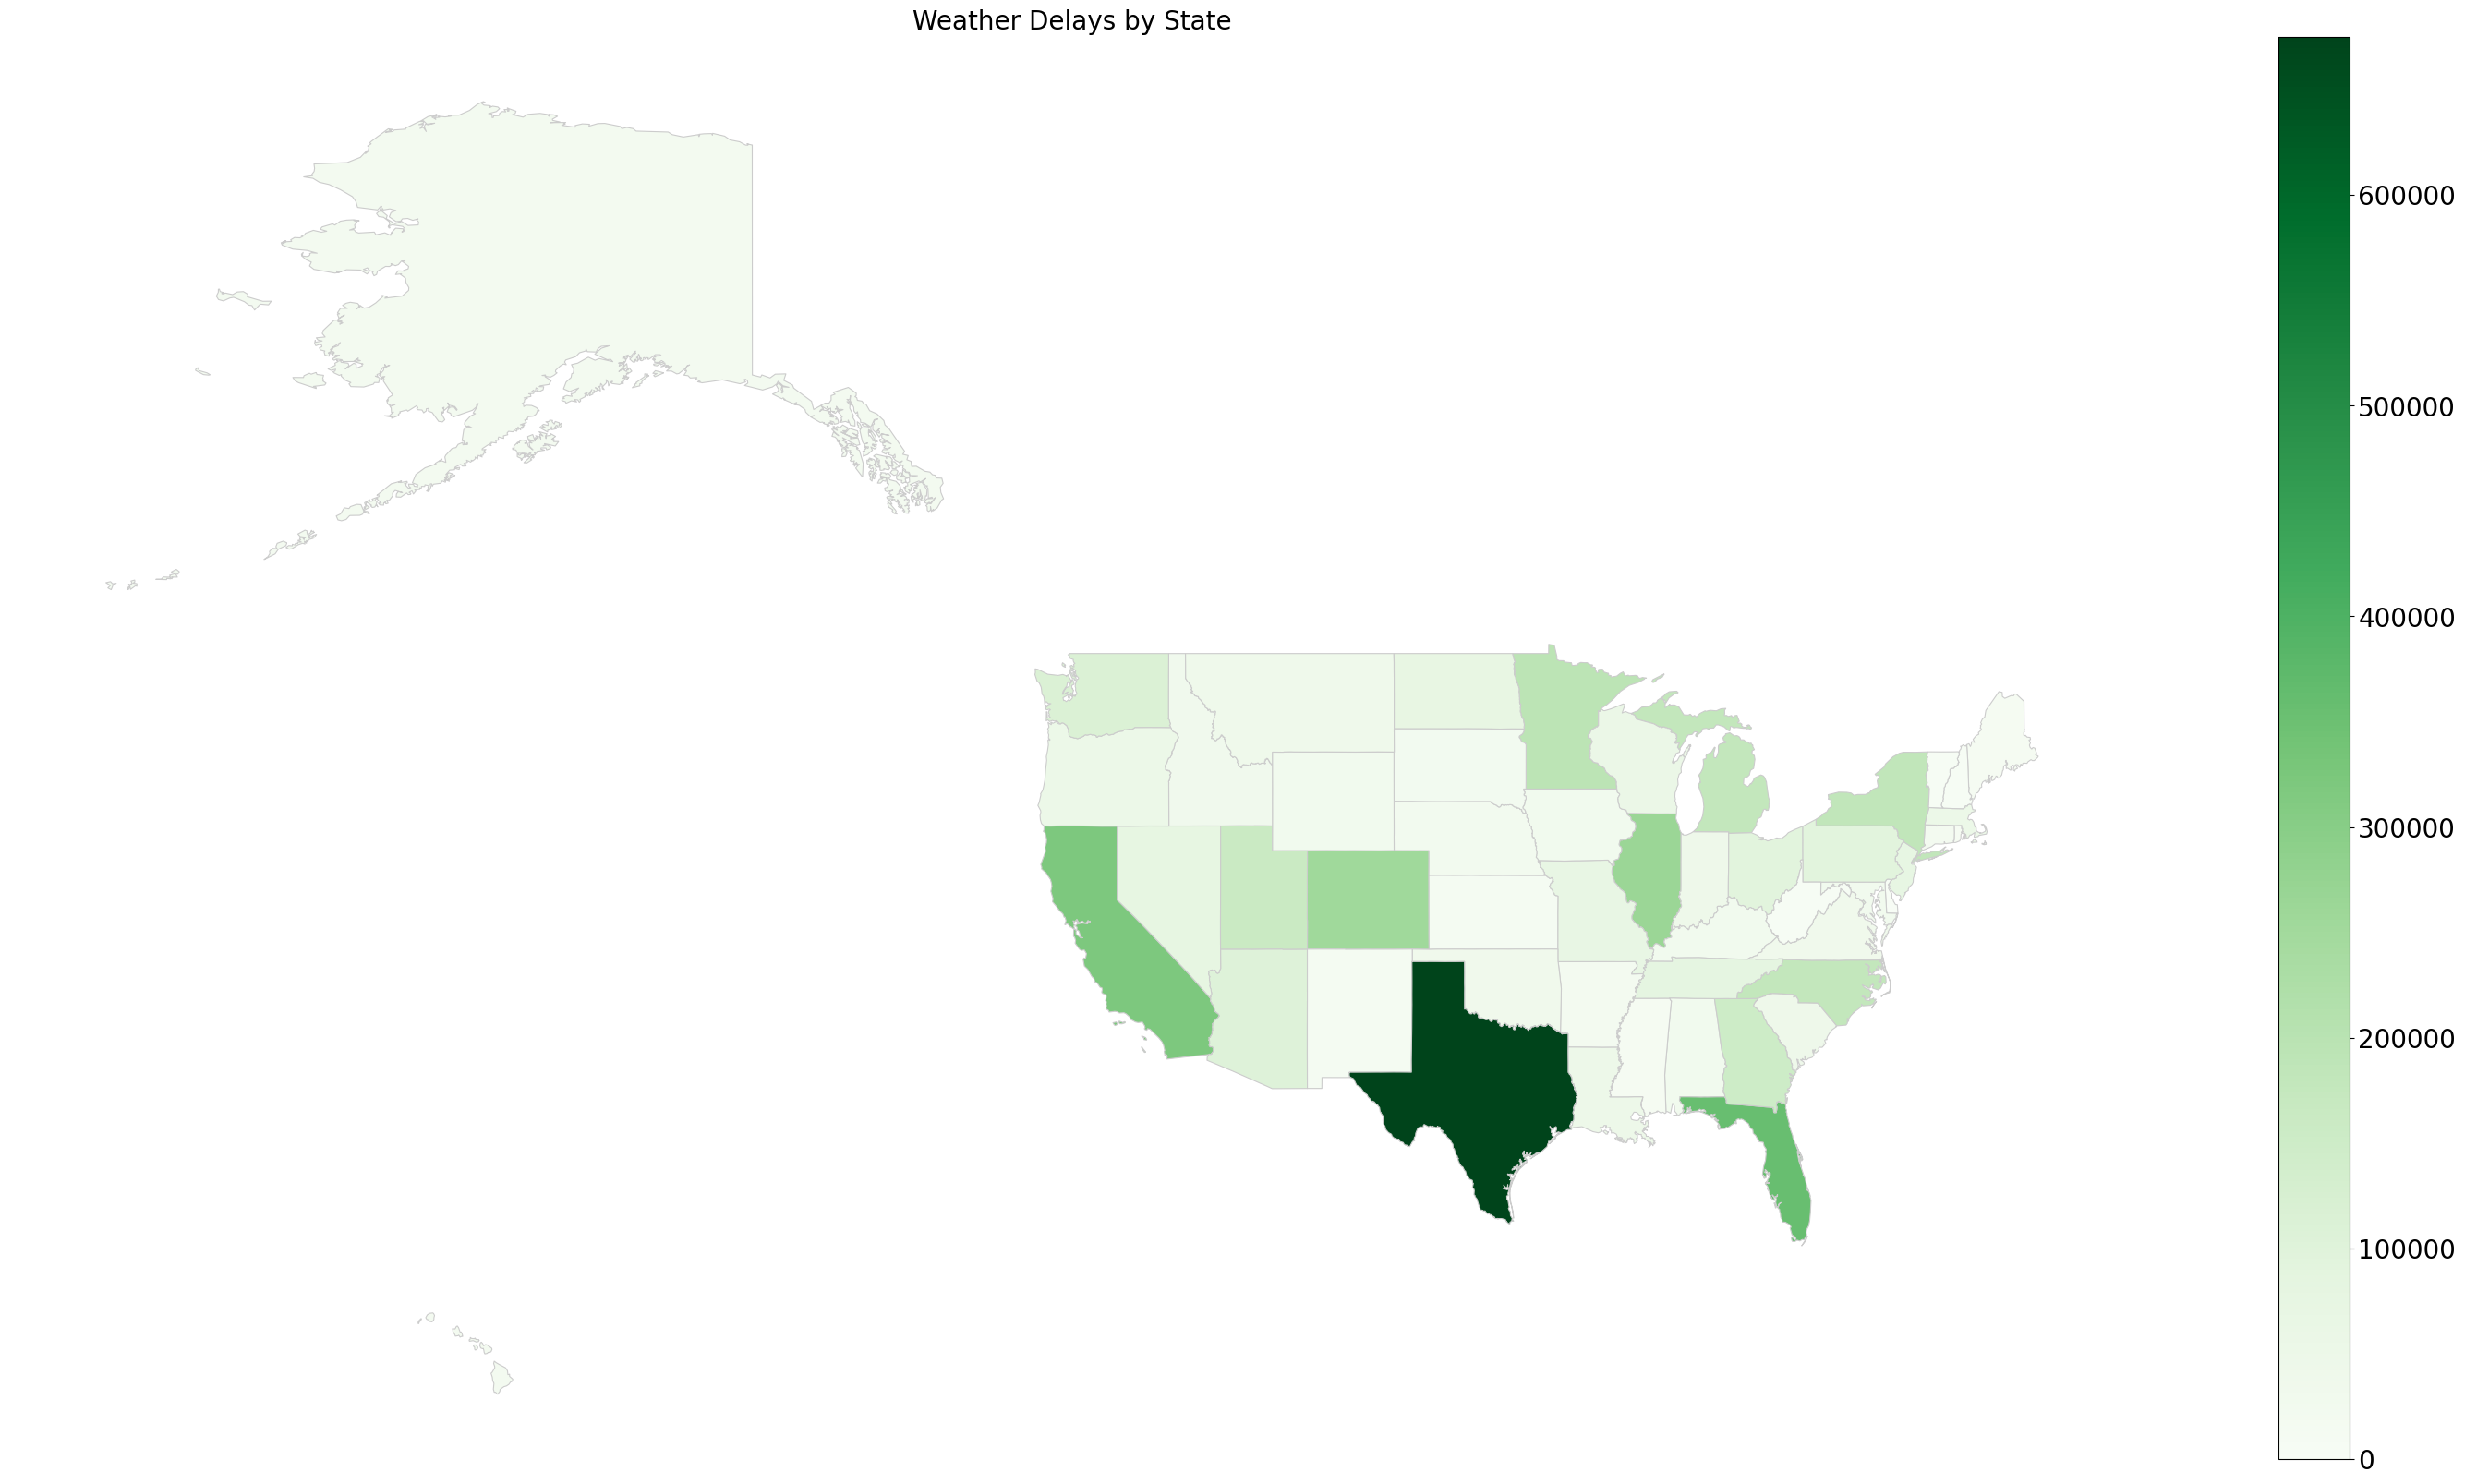

In [14]:
merged = us_map.set_index('Statecode').join(df3.set_index('Statecode'))
merged = merged.reset_index()
merged = merged.fillna(0)
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Weather Delays by State', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 675000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('weather_delay', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))


#### This data was procured in 2021, which is why Texas has such a massively large number of weather delays given in 2021 Texas had a large winter storm delaying or cancelling most flights in and out of the state in the last half of Febuary. Large population centres like California and Florida also have many weather delays given the sheer number of flights in and out of the states.

<AxesSubplot:>

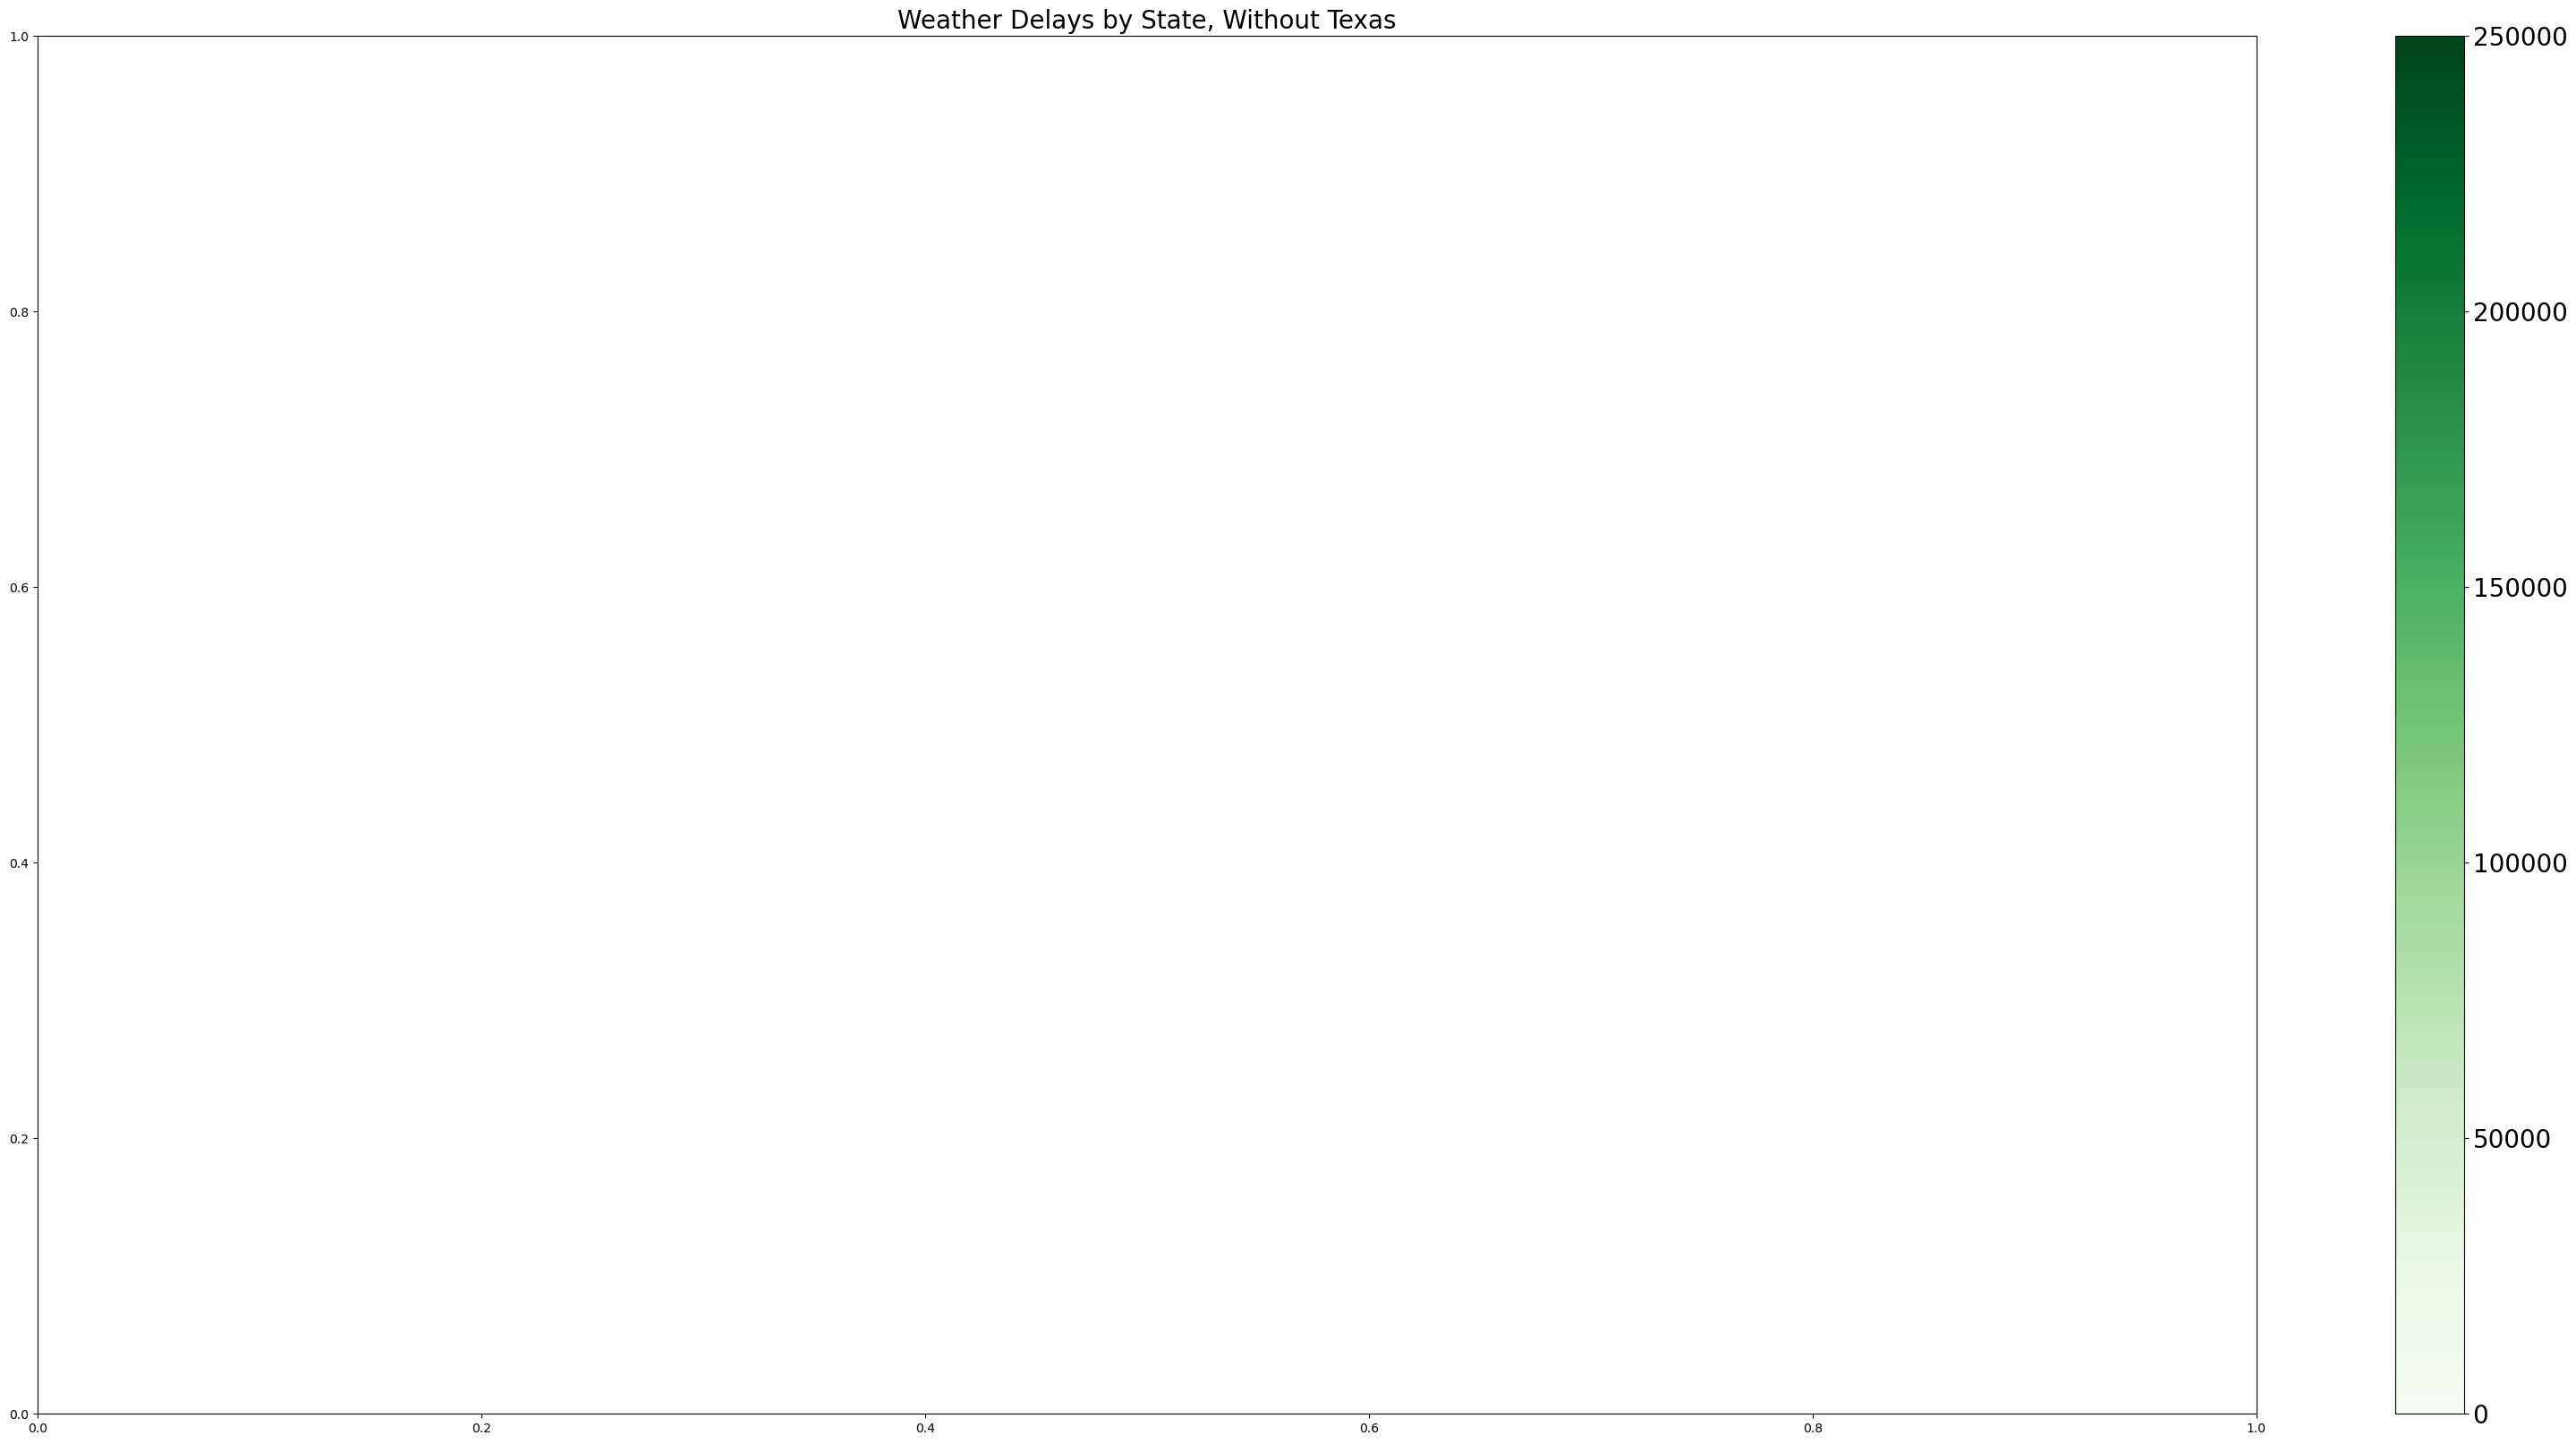

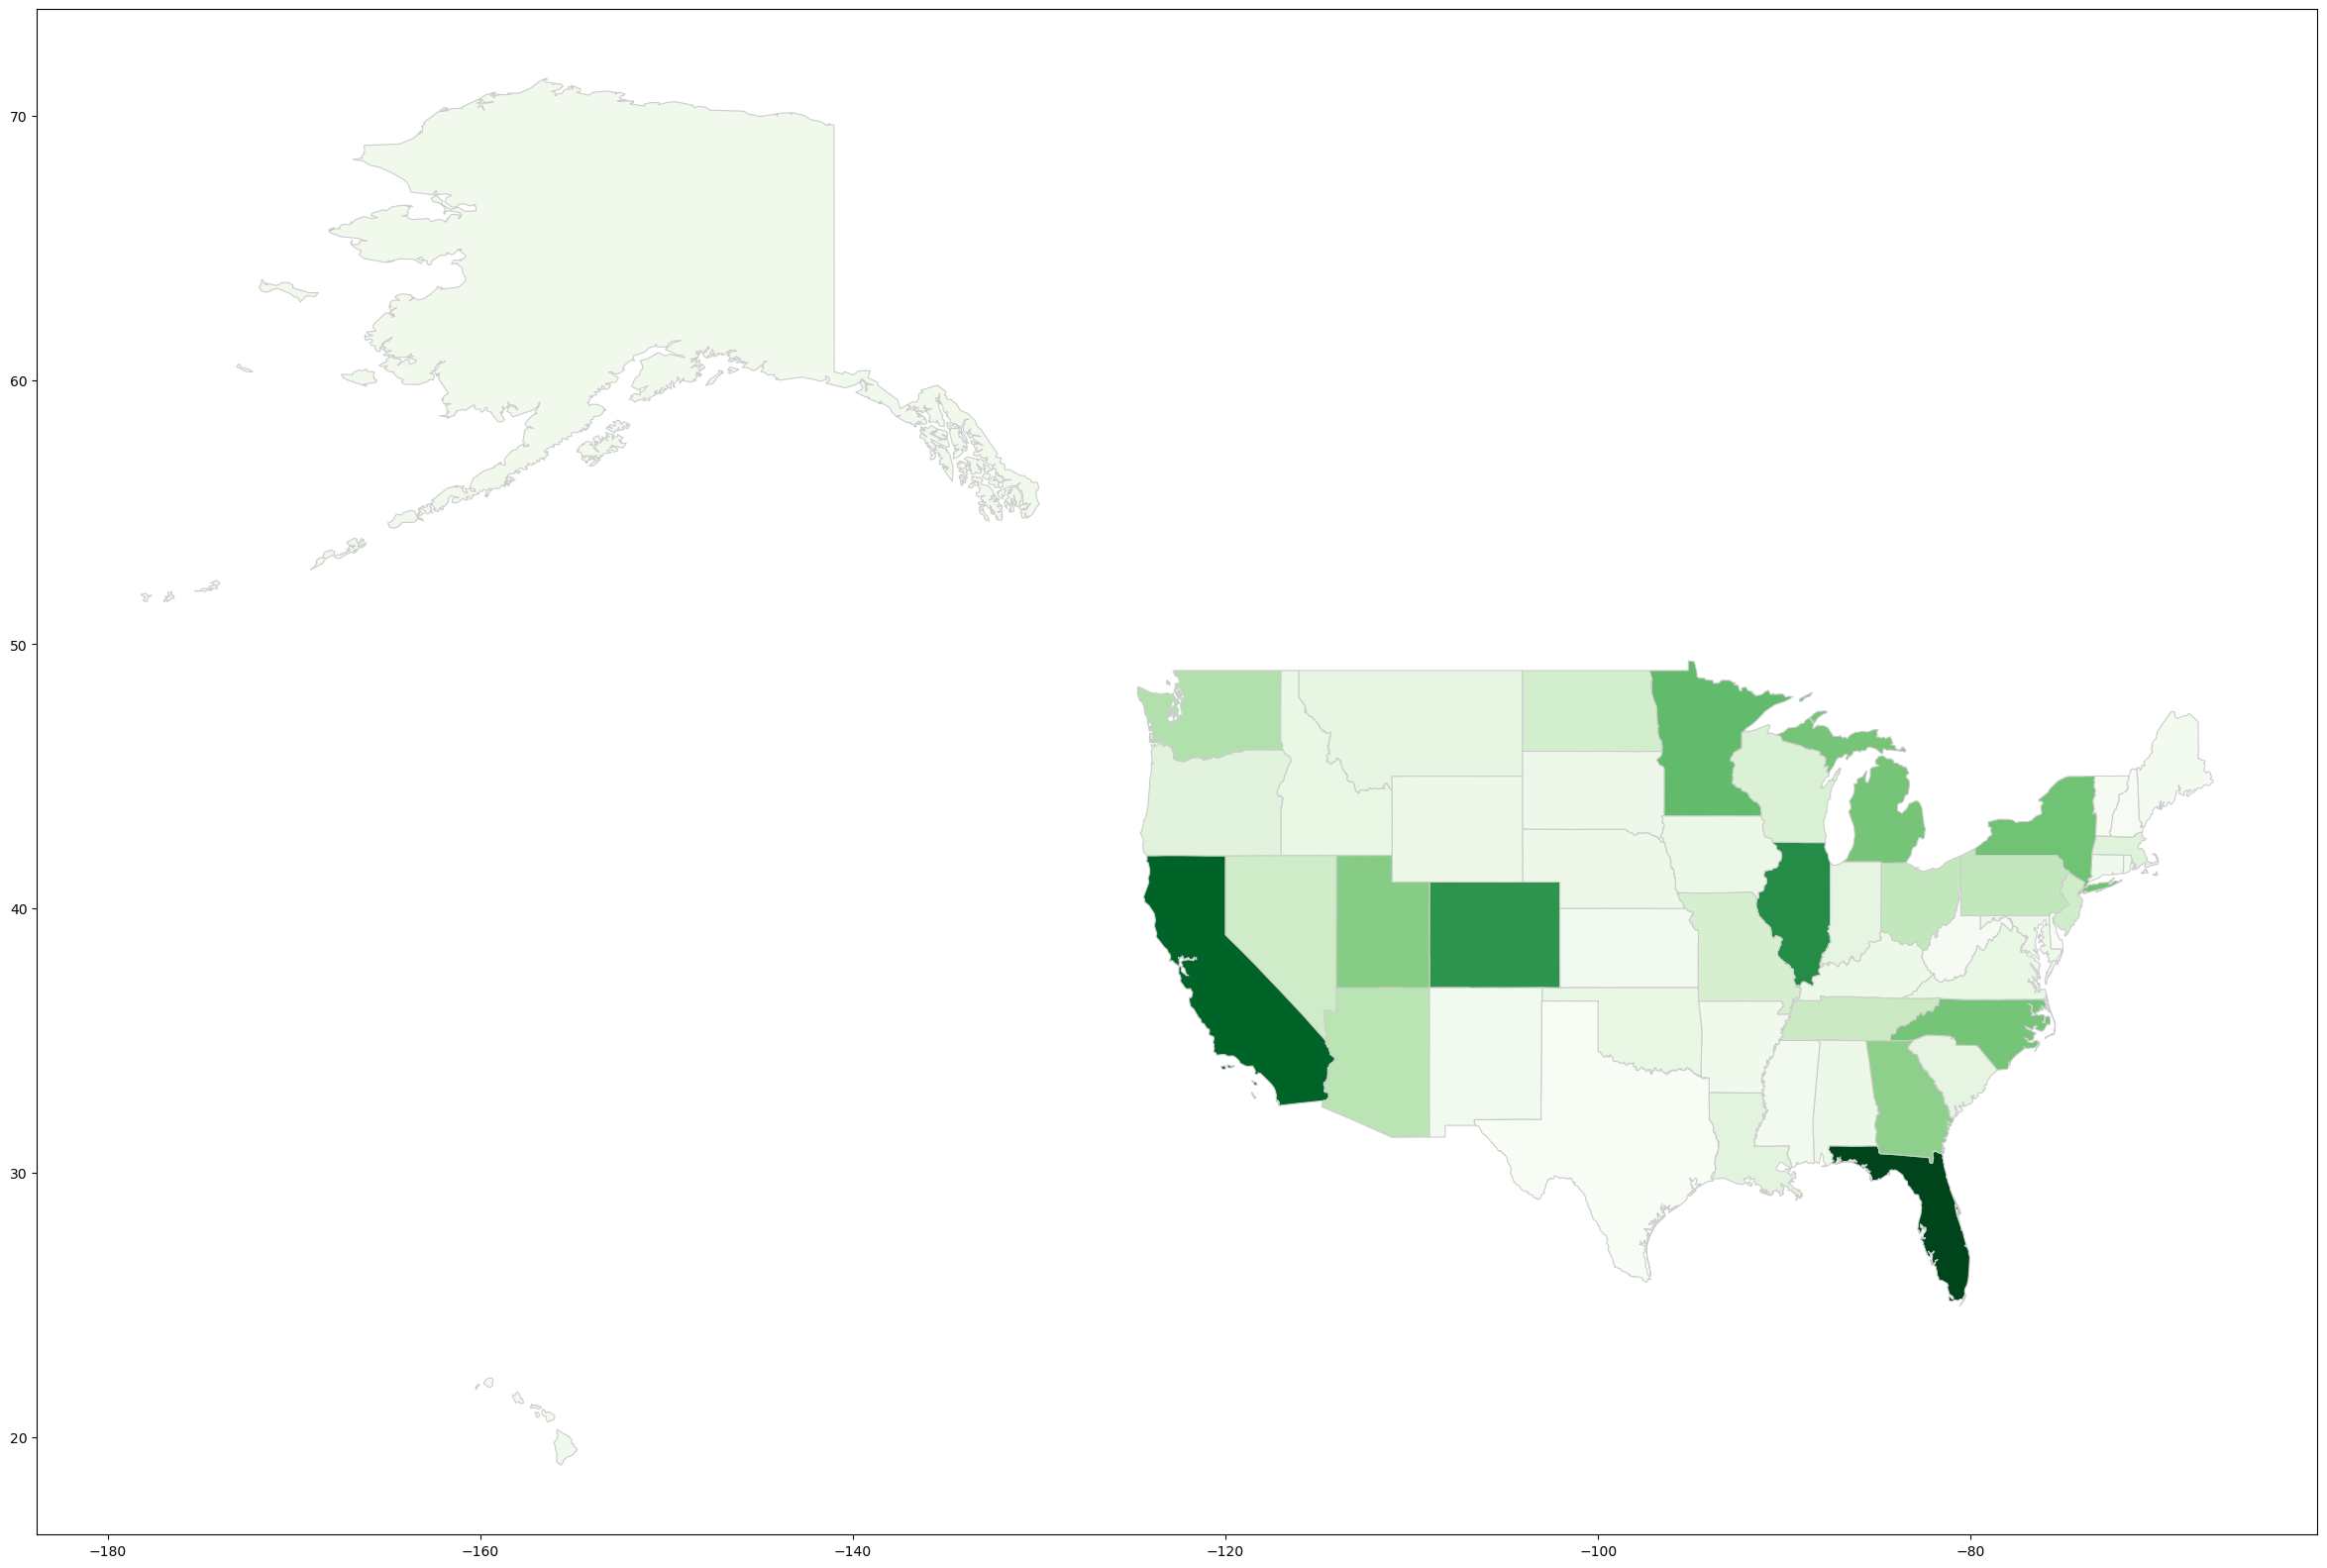

In [15]:
df4=df3[df3['Statecode'].str.contains('TX')==False]
merged1 = us_map.set_index('Statecode').join(df4.set_index('Statecode'))
merged1 = merged1.reset_index()
merged1 = merged1.fillna(0)
fig, ax1 = plt.subplots(1, figsize=(40, 20))
ax1.axis('on')
ax1.set_title('Weather Delays by State, Without Texas', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 250000
sm1 = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm1._A = []
cbar1 = fig.colorbar(sm1)
cbar1.ax.tick_params(labelsize=20)
merged1.plot('weather_delay', cmap=color,linewidth=0.8, edgecolor='0.8', figsize=(40,20))

#### When removing Texas from the data, California, Florida, and Colorado become much more prominant for weather delays. California and Florida for the large number of flights in and out of the state, and Colorado which has a much smaller population but it's major airport, Denver, is a major connecting hub for United and is located at a high altitude thus creating more adverse weather conditions.

In [16]:
pv1 = airlinedata3.pivot_table("weather_delay", index = "month", columns = ["Statecode"], aggfunc = np.sum)
pv1.sort_index(inplace=True, ascending=True)
pv1= pv1.fillna(0)
import bar_chart_race as bcr
bcr.bar_chart_race(df=pv1,
filename="bcr2.gif", 
filter_column_colors=True, 
cmap='prism', sort = 'desc', 
n_bars = 10, fixed_max = True, 
period_length = 5000, 
period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Total delays: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
title='State Weather Delay by Month', figsize=(6, 4))


C:\Users\maxti\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\maxti\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
MovieWriter imagemagick unavailable; using Pillow instead.


#### Texas easily has the most weather delays in the first half of the year, mostly due to the winter storm and damage it caused. This may not be true for other years however given Texas usually has favorable weather conditions for flying and does not incure many technology or weather delays.

In [17]:
pv2 = airlinedata1.pivot_table("late_aircraft_delay", index = "month", columns = ["carrier_name"], aggfunc = np.sum)
pv1.sort_index(inplace=True, ascending=True)
pv1= pv1.fillna(0)
bcr.bar_chart_race(df=pv2,
filename="bcr1.gif", 
filter_column_colors=True, 
cmap='prism', sort = 'desc', 
n_bars = 10, fixed_max = True, 
period_length = 4000, 
period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Total delays: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
title='Airline Late Aircraft Delay by Month', figsize=(6, 4))

C:\Users\maxti\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\maxti\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
MovieWriter imagemagick unavailable; using Pillow instead.


#### Southwest and American both opperate many flights in and out of Texas, both opperating hubs in Dallas TX. So, in the first half of 2021, these two airlines had many late aircraft delays as aircraft that were delayed in Texas could not be used to opperate scheduled flights elsewhere. It is notable that Jetblue and Allegiant are consitently in the top 10 of late aircraft delays per month. These airlines don't opperate many flights in and out of Texas or the surrounding states and have small fleets, suggesting that teir aircraft are late for carrier related reasons that are not out of the control of the airline.

#### Both the above code blocks produce the .gif files in the analysis folder.

C:\Users\maxti\AppData\Local\Temp\ipykernel_1204\1451252305.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatdf1=airlinedata2.pivot("month", "Airline", "bags_mishandled")


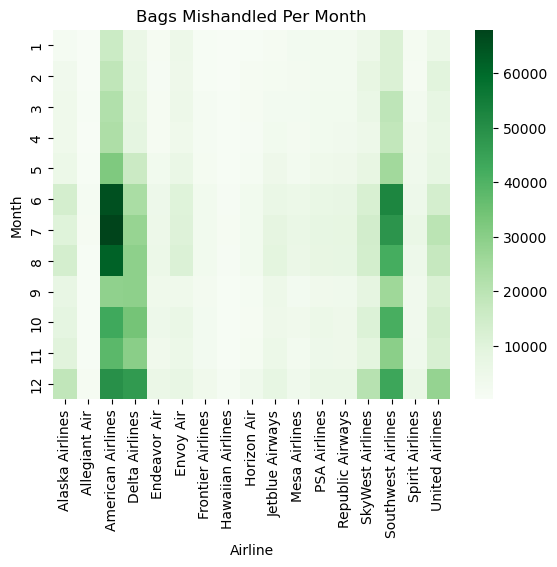

In [5]:
heatdf1=airlinedata2.pivot("month", "Airline", "bags_mishandled")
heatmap=sns.heatmap(heatdf1,cmap='Greens').set(ylabel='Month',title='Bags Mishandled Per Month')

#### The large carriers in the US mishandle the most bags. This is unsuprising given they typically handle the most baggage through complicated route networks. A mishandled bag is defined by the FAA as a bag that does not meet the intended destination in a 'timely' matter, or within four hours of the arrival time of the aircraft. Also, bags or their contents that are damaged are defined as 'mishandled'.

C:\Users\maxti\AppData\Local\Temp\ipykernel_21588\2813844850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatdf2=airlinedata2.pivot("month", "Airline", "cancelled_per_flight")


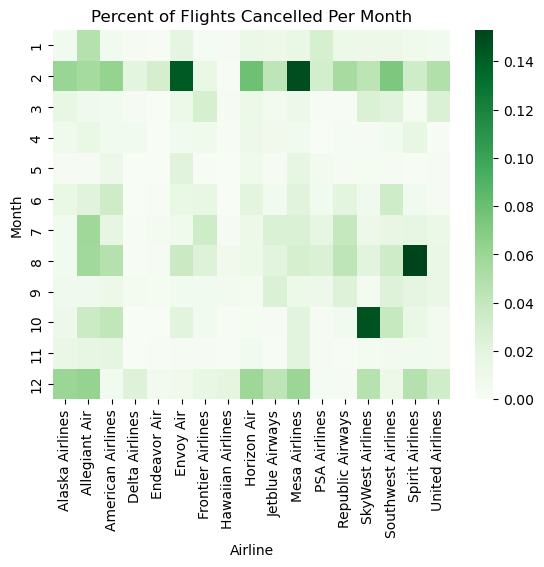

In [19]:
heatdf2=airlinedata2.pivot("month", "Airline", "cancelled_per_flight")
heatmap1=sns.heatmap(heatdf2,cmap='Greens').set(ylabel='Month',title='Percent of Flights Cancelled Per Month')

#### Ignoring Febuary due to the Texas winter storm, Skywest, Spirit, and Allegiant cancel the most flights consistently. 

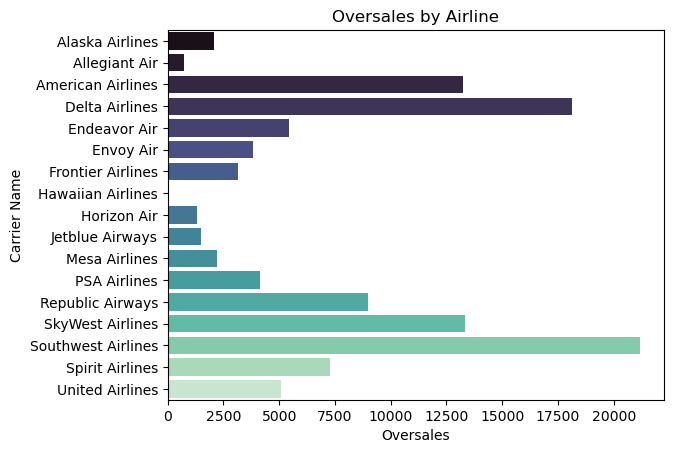

In [20]:
airlinedata2.head()
oversales=airlinedata2.groupby('Airline')['oversales'].sum().reset_index()
hist=sns.barplot(data=oversales,x='oversales',y='Airline',palette="mako").set(xlabel="Oversales",ylabel="Carrier Name",title="Oversales by Airline")

#### Southwest, Delta, and American, oversell the most seats. They do have the largest networks and carry the most passengers in the US but oversales are a variable that are easily avoided if airlines simply do not sell more seats then are avaliable. United and Alaska, airlines which are comparable in size the the aformentioned three do not oversell many seats, this is because they try to only sell the seats that are avaliable. Airlines sell more seats then avaliable as a strategy to fill airplanes if passengers cancel or change flights. This is an unnecessary and inconvienient fact for the consumer.
#### Oversales are defined as passengers who have paid full price for a confirmed ticket on a flight, only to be bumped to a later flight because the airline sold too many seats.

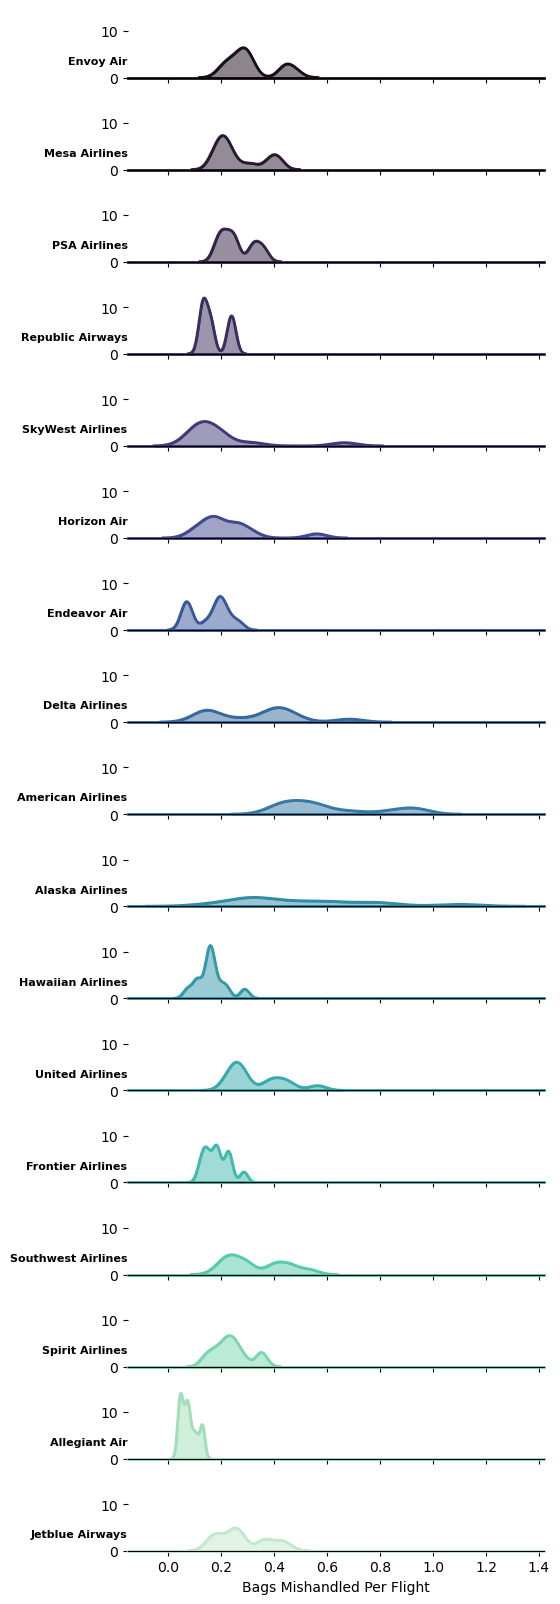

In [33]:
ridge = sns.FacetGrid(airlinedata2, row="Airline", hue="Airline", aspect=6, height=.95, palette="mako")
ridge.map(sns.kdeplot, "mishandeled_per_flight",bw_adjust=.5, clip_on=False,fill=True, alpha=.5, linewidth=1.5)
ridge.map(sns.kdeplot, "mishandeled_per_flight", clip_on=True, color=None, lw=2, bw_adjust=.5)
ridge.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color='black',
            ha="right",fontsize=8, va="baseline", transform=ax.transAxes)
ridge.map(label, "mishandeled_per_flight")
ridge.figure.subplots_adjust(hspace=-.25)
ridge.set_titles("")
ridge.set(ylabel="",xlabel="Bags Mishandled Per Flight")
ridge.despine(bottom=False, left=True)
ridge.tight_layout()

#### This graph shows many interesting things with regard to mishanled baggage. This graph shows that the major carriers in the US more consistently mishandle baggage throughout the year. But smaller carriers mishandle more bags in certain months. 

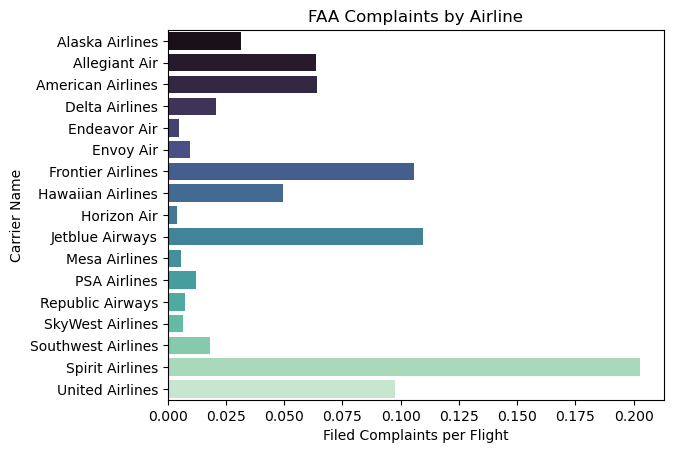

In [31]:
complaintsdf=airlinedata2.groupby('Airline')['complaints_per_flight'].sum().reset_index()
complaints=sns.barplot(complaintsdf,x='complaints_per_flight',y='Airline',palette="mako").set(xlabel="Filed Complaints per Flight",ylabel="Carrier Name",title="FAA Complaints by Airline")

#### This graph shows that Spirit airlines is by far the most complained about Airline in the US. This metric is the only good measure of customer experience and quality of service of the airlines. Spirit, with a relatively small fleet and route network has about one filed complaint per 5 flights. FAA complaints are filtered by the FAA before being published to remove bias of unfair greviances against the airlines.